### header 탐색 후 원하는 컬럼 선택 할것 이용과 관련 있는것으로

In [5]:
from pyspark.sql import SparkSession
from typing import Generator, List
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import os 

spark = SparkSession.builder.master("local").appName("year-taxi").getOrCreate()

# directory: Generator[str, None, None] = (f"{os.getcwd()}/data/{i}" for i in range(1, len(os.listdir(f"{os.getcwd()}/data"))))
# filename: List[str] = [f"{p}/{data}" for p in directory for data in os.listdir(p)]

In [6]:
directory: str = f"{os.getcwd()}/data/2020"
trip1: str = "fhvhv_tripdata_2020-01.parquet"

trip_data1 = spark.read.parquet(f"file:///{directory}/{trip1}")
trip_data1.createOrReplaceTempView('month2020_data')

In [7]:
qs = """
SELECT
    pickup, count(*) as trip
FROM
    (SELECT split(pickup_datetime, " ")[0] as pickup FROM month2020_data)
GROUP BY
    pickup
ORDER BY 
    pickup
"""
cal_date = spark.sql(qs).createOrReplaceTempView("week_trip")
df_pan = spark.sql(qs).toPandas()

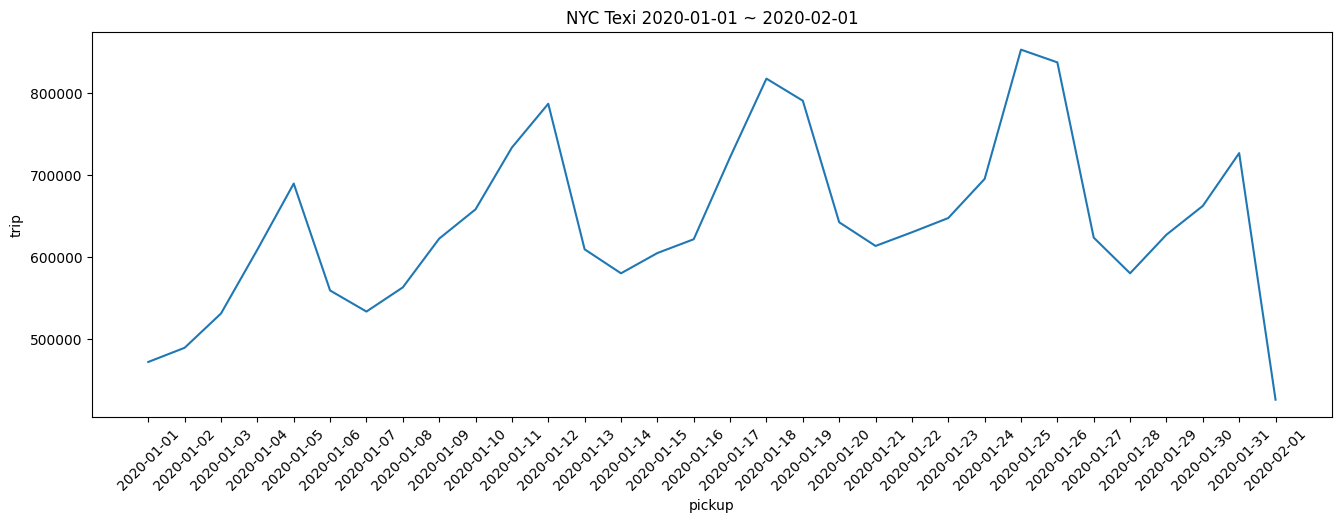

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 

fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(x="pickup", y="trip", data=df_pan)
plt.xticks(rotation=45)
plt.title("NYC Texi 2020-01-01 ~ 2020-02-01")
plt.show()


In [36]:
qs = """
SELECT
    DATE_FORMAT(pickup, "EEEE") as week, trip
FROM 
    week_trip
"""
data = spark.sql(qs).toPandas()
spark.sql(qs).show()

+---------+------+
|     week|  trip|
+---------+------+
|Wednesday|472471|
| Thursday|489748|
|   Friday|531514|
| Saturday|609353|
|   Sunday|689872|
|   Monday|559593|
|  Tuesday|533889|
|Wednesday|563356|
| Thursday|622750|
|   Friday|658476|
| Saturday|733788|
|   Sunday|787143|
|   Monday|609765|
|  Tuesday|580507|
|Wednesday|605194|
| Thursday|622009|
|   Friday|721971|
| Saturday|817781|
|   Sunday|790818|
|   Monday|642733|
+---------+------+
only showing top 20 rows



,week,trip,sort_dow
0,Friday,695526.0,3
1,Monday,616879.0,4
2,Saturday,733788.0,5
3,Sunday,788980.5,6
4,Thursday,622750.0,0
5,Tuesday,580521.5,1
6,Wednesday,605194.0,2


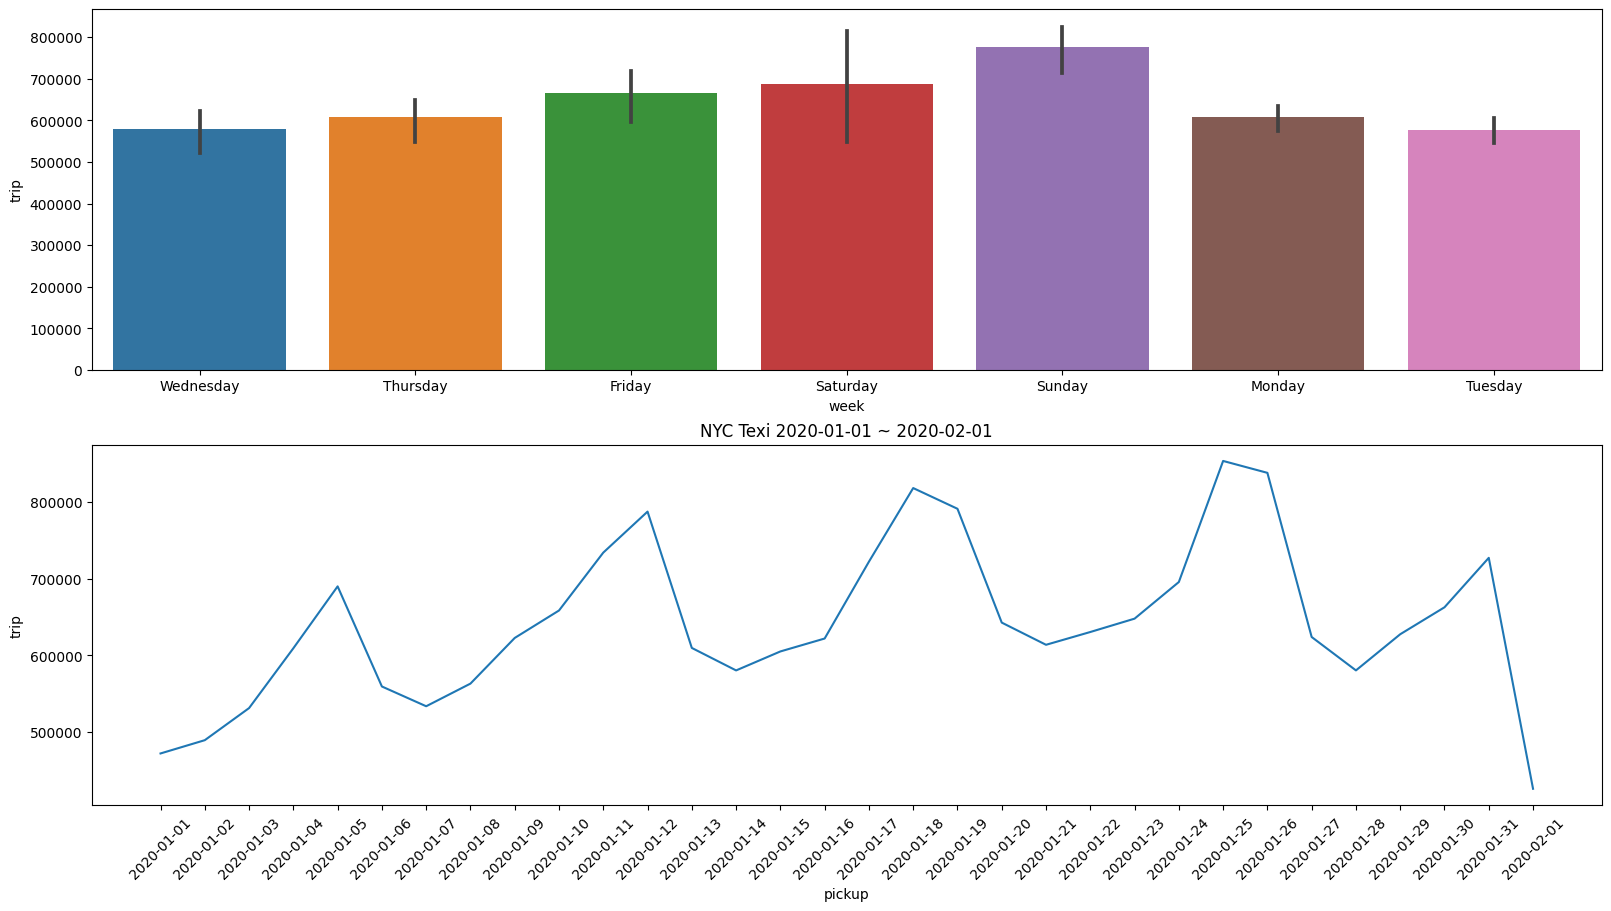

In [43]:

fig, ax = plt.subplots(2, 1, figsize=(16, 9), constrained_layout=True)
sns.barplot(x="week", y="trip", data=data, ax=ax[0])
sns.lineplot(x="pickup", y="trip", data=df_pan)
plt.xticks(rotation=45)
plt.title("NYC Texi 2020-01-01 ~ 2020-02-01")
plt.show()

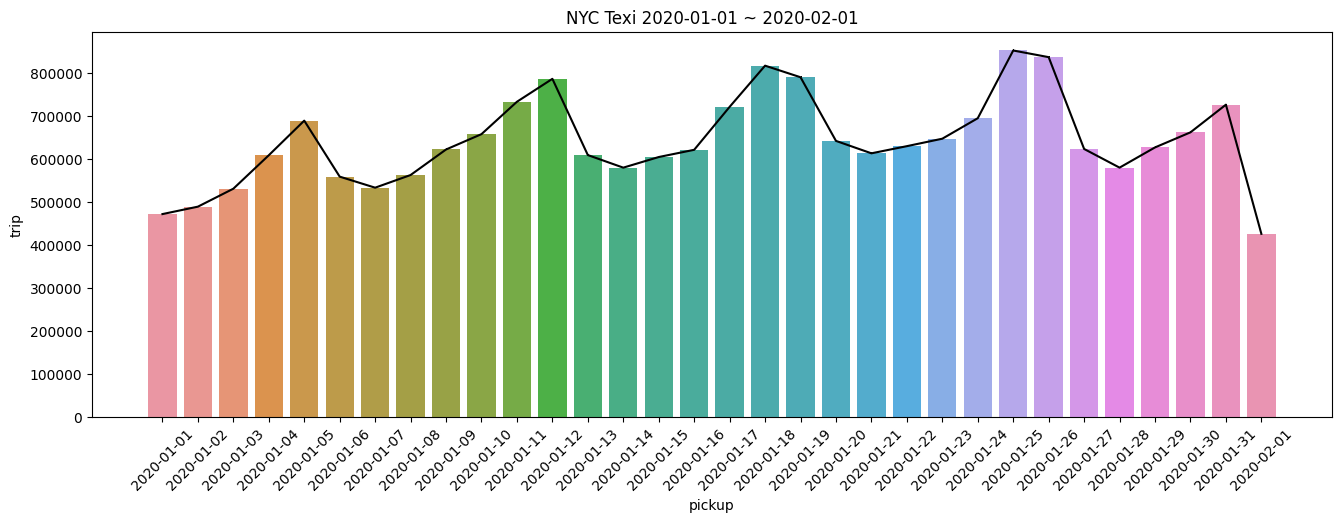

In [53]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(x="pickup", y="trip", data=df_pan)
sns.lineplot(x="pickup", y="trip", data=df_pan, linestyle='-', color='black', marker=',')
plt.xticks(rotation=45)
plt.title("NYC Texi 2020-01-01 ~ 2020-02-01")
plt.show()
